# Visualizing Topic Over Time

### Imports

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

### Initial map to store topics

In [87]:
pres_list = "adams arthur bharrison buchanan bush carter cleveland cleveland2 clinton coolidge eisenhower fdroosevelt fillmore ford garfield grant gwbush harding harrison hayes hoover jackson jefferson johnson jqadams kennedy lbjohnson lincoln madison mckinley monroe nixon obama pierce polk reagan roosevelt taft taylor truman tyler vanburen washington wilson".split()
topic_map = dict()
for pres in pres_list:
    topic_map[pres] = []

### Import data

In [88]:
import os
for filename in os.listdir('./output'):
    topics = open('./output/' + filename, encoding='utf-8').readlines()[0].split()
    for topic in topics:
        if topic not in topic_map[filename[:-4]]:
            topic_map[filename[:-4]].append(topic)

In [89]:
terms = [1797, 1881.5, 1889, 1857, 1989, 1977, 1885, 1893, 1993, 1923, 1953, 1933, 1850, 1974, 1881, 1869, 2001, 1921, 1841.5, 1877, 1929, 1829, 1801, 1865, 1825, 1961, 1963, 1861, 1809, 1897, 1817, 1969, 2009, 1853, 1845, 1981, 1901, 1909, 1849, 1945, 1841, 1837, 1789, 1913]
pres_terms = list(zip(pres_list, terms))
pres_terms.sort(key=lambda k: k[1])

### Order data by year

In [ ]:
ordered_topics = [topic_map[pres[0]] for pres in pres_terms]
ordered_topics_str = []

for l in ordered_topics:
    ordered_topics_str.append("\n".join(l))
ordered_topics_str[:5]

### Visualize data in matplotlib timeline

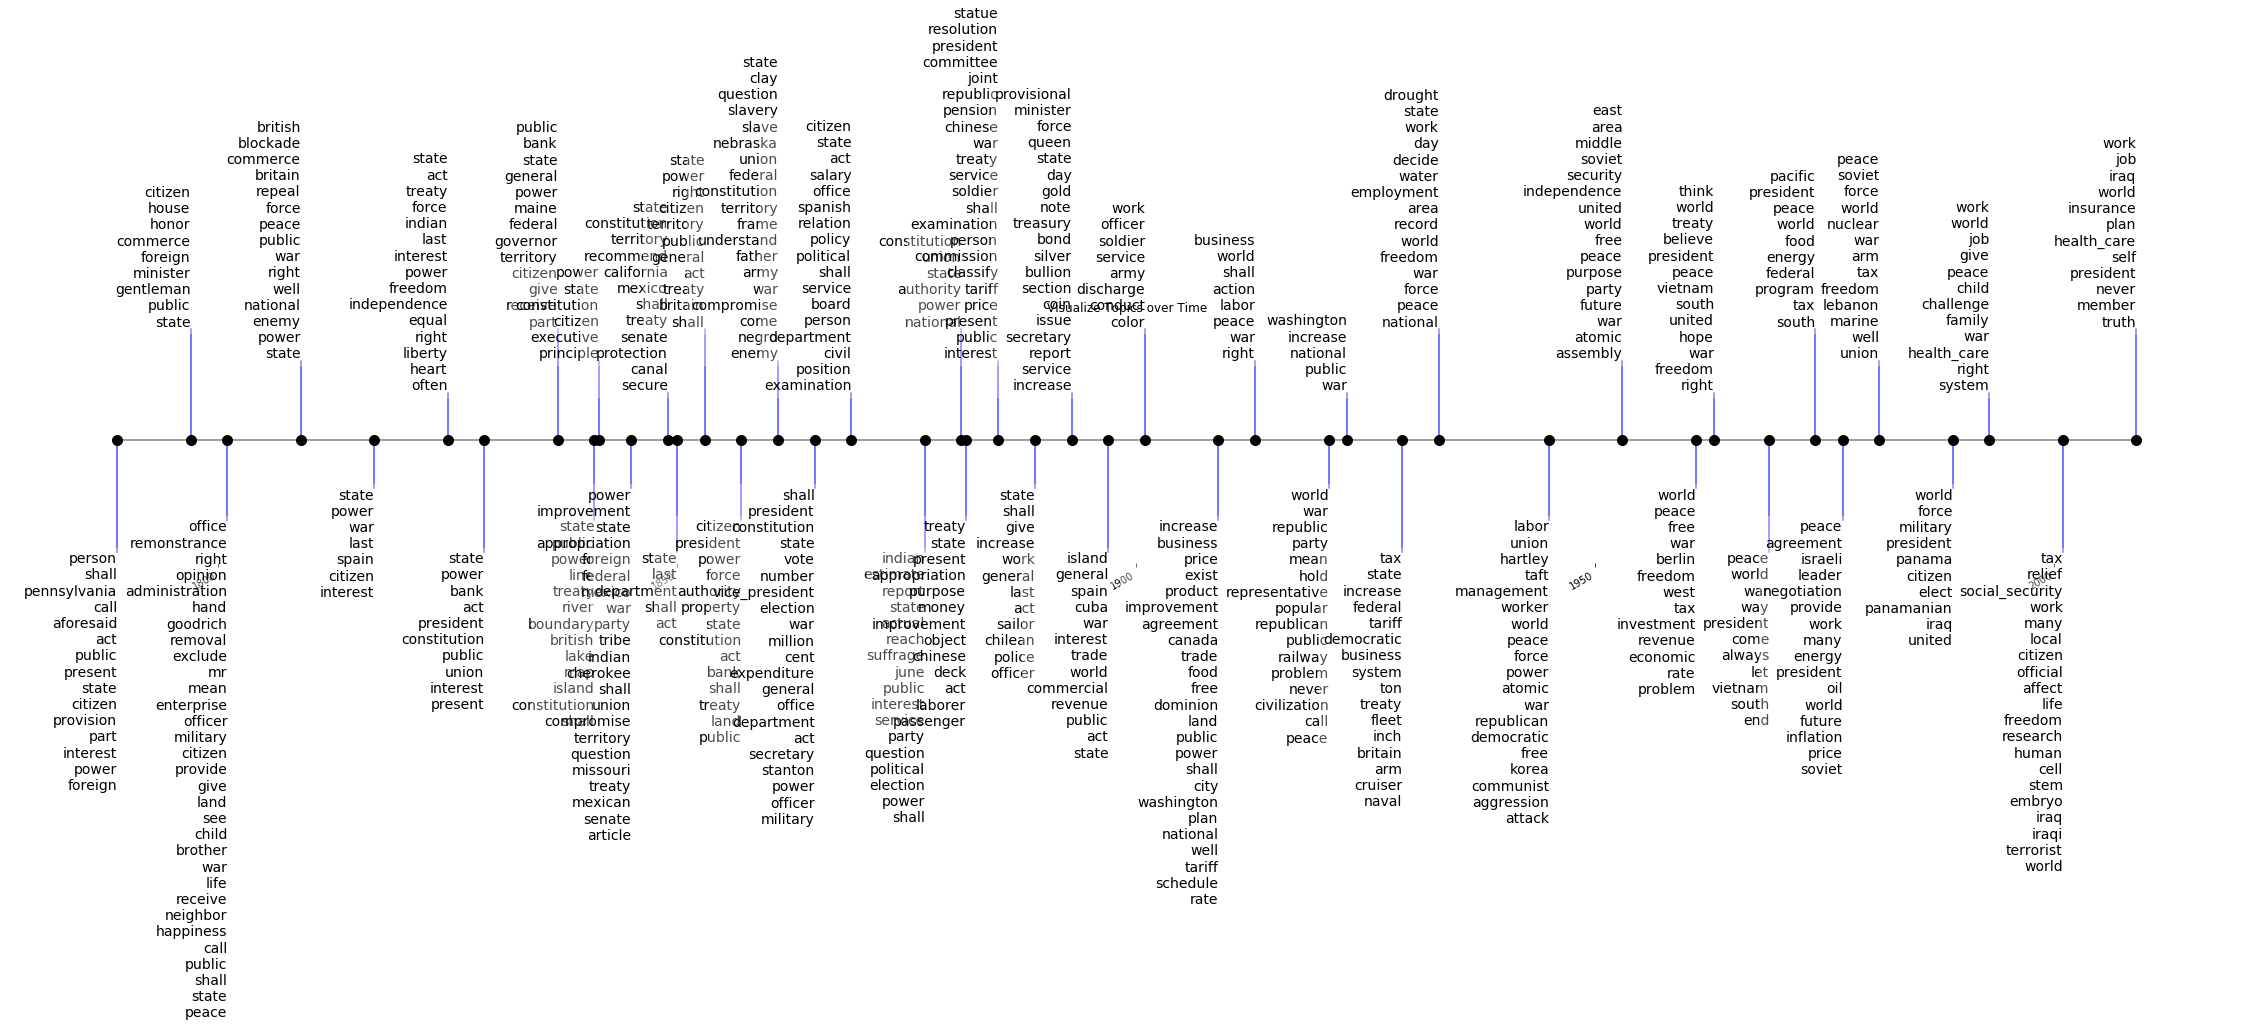

In [91]:
dates = sorted(terms)

levels = np.array([-7, 7, -5, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(40, 5))

# Create the base line
start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

# Iterate through releases annotating each one
for ii, (iname, idate) in enumerate(zip(ordered_topics_str, dates)):
    level = levels[ii % 6]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='black', edgecolor='k', zorder=9999)
    # Plot a line up to the text
    ax.plot((idate, idate), (0, level), c='blue', alpha=.7)
    # Give the text a faint background and align it properly
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
ax.set(title="Visualize Topics over Time")
fig.autofmt_xdate()

# Remove components for a cleaner look
plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)
plt.show()